# Algortimo Genetico para resolver TSP

Este notebook emplearemos un algoritmo genetico y el lenguaje de programacion Python para solucionar el problema del ajente viajero (TSP). 

## Representacion del problema en un Grafo

Para resolver el TSP primero necesitamos representar el problema mediante un grafo ponderado, en el cual cada nodo sera una ciudad y cada arco repesentará un camino entre las 2 ciudades donde el peso del arco sera la distancia entre las ciudades

A continuacion se muestra la reprecentacion en grafo del problema TSP que resolveremos en este notebook

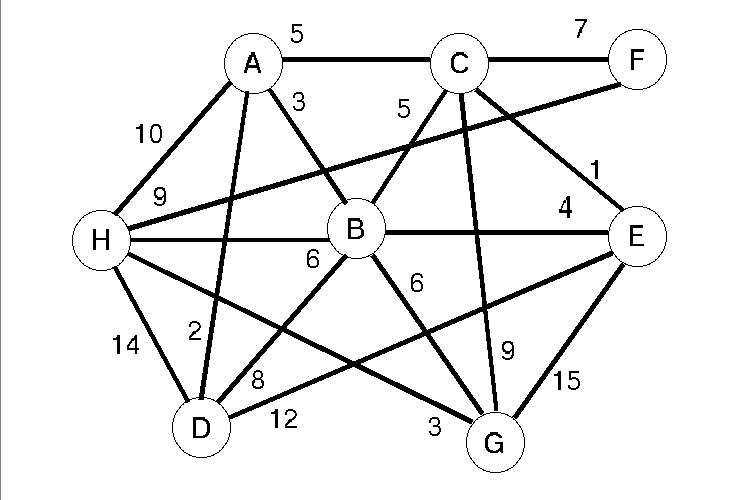

## Reprecentación del Grafo en Lista de Adyacencia 

Lamentablemete la computarora no entiende la informacion del grafo si se la damos como una imagen, para que la cumputadora lo entienda tenemos que pasarle la informacion del grafo en forma de matriz de adyacencia o de lista de adyacencia, como trabajaremos con python donde es facil crear listas de adyacencia mediante diccionarios usaremos la lista de adyacencia para eficientar nuestro uso de memoria

En la siguiente imagen se pueda observar la representación de un grafo mediante una lista de adyacencia

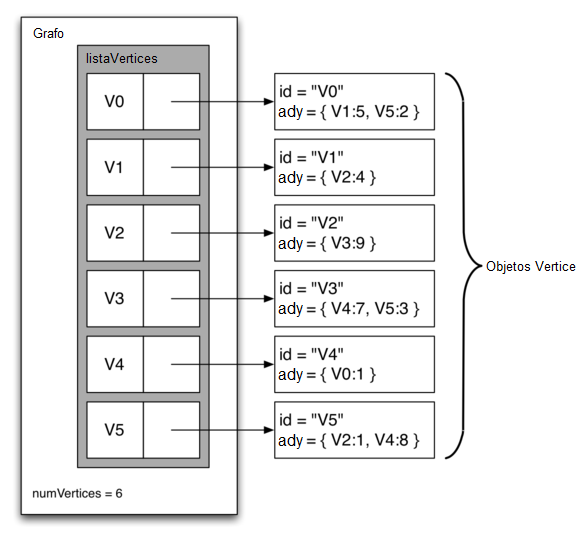

A continuacion usaremos los dicionarios de Python para generar el grafo mediante una lista de adyacencia

In [1]:
#Lista de ciudades
ciudades = ["A","B","C","D","E","F","G","H"]

In [2]:
#Creamos un dicionario de dicionarios vacios con cada ciudad como llave (key)
grafo = {ciudad:{} for ciudad in ciudades}

In [3]:
#Añadimos a cada ciudad sus ciudades adyacentes y distacias
grafo["A"]={"B":3,"C":5,"D":2,"H":10}
grafo["B"]={"A":3,"C":5,"D":8,"E":4,"G":6,"H":6}
grafo["C"]={"A":5,"B":5,"E":1,"F":7,"G":9}
grafo["D"]={"A":2,"B":8,"E":12,"H":14}
grafo["E"]={"B":4,"C":1,"D":12,"G":15}
grafo["F"]={"C":7,"H":9}
grafo["G"]={"B":6,"C":9,"E":15,"H":3}
grafo["H"]={"A":10,"B":6,"D":14,"F":9,"G":3}

Antes de continuar observemos el contenido de nuestro grafo

In [4]:
grafo

{'A': {'B': 3, 'C': 5, 'D': 2, 'H': 10},
 'B': {'A': 3, 'C': 5, 'D': 8, 'E': 4, 'G': 6, 'H': 6},
 'C': {'A': 5, 'B': 5, 'E': 1, 'F': 7, 'G': 9},
 'D': {'A': 2, 'B': 8, 'E': 12, 'H': 14},
 'E': {'B': 4, 'C': 1, 'D': 12, 'G': 15},
 'F': {'C': 7, 'H': 9},
 'G': {'B': 6, 'C': 9, 'E': 15, 'H': 3},
 'H': {'A': 10, 'B': 6, 'D': 14, 'F': 9, 'G': 3}}

Como se puede observar grafo en un dicionario que contiene cada una de las ciudades, y cada ciudad es un dicionario que contiene cada ciudad adyacente y su respectiva distacia

## Generando poblacion inicial

En los algoritmos geneticos cada individuo es una propuesta de solucion codificada, en nuestro caso para el TSP cada individuo sera una lista oredenada que indique el orden en el que se recorrieron las ciudades, devido a la naturaleza del problema hay 2 cosas que devemos considerar:
* Cada individuo debe de contener todas las cuidades
* No se pueden repetir ciudades dentro del mismo individuo

Por lo que cada individuo sera una permutacion del conjunto de ciudades

Para cumplir con las restricciones anteriormente descritas nosotros generaremos la poblacion inicial revolviendo los valores de la lista de ciudades mediante el metodo shuffle

In [5]:
from random import shuffle

In [6]:
tam_poblacion = 25
generacion = 0

In [7]:
poblacion = []
for i in range(tam_poblacion):
    #Mezcla los elementos de la lista ciudades
    shuffle(ciudades)
    #Agrega a poblacion una copia de la lista cidades
    poblacion.append(list(ciudades))

Observemos el contenido de poblacion para asegurarnos de que la poblacion inicial se genero correctamente

In [8]:
poblacion

[['F', 'H', 'A', 'G', 'D', 'E', 'C', 'B'],
 ['A', 'F', 'H', 'E', 'D', 'C', 'B', 'G'],
 ['A', 'D', 'G', 'B', 'C', 'H', 'F', 'E'],
 ['A', 'D', 'G', 'C', 'E', 'B', 'F', 'H'],
 ['D', 'F', 'E', 'A', 'B', 'C', 'H', 'G'],
 ['D', 'B', 'G', 'F', 'H', 'C', 'E', 'A'],
 ['F', 'H', 'E', 'C', 'G', 'B', 'A', 'D'],
 ['G', 'F', 'H', 'D', 'B', 'E', 'C', 'A'],
 ['D', 'G', 'C', 'B', 'F', 'E', 'H', 'A'],
 ['E', 'A', 'F', 'B', 'D', 'G', 'H', 'C'],
 ['F', 'G', 'H', 'B', 'A', 'E', 'C', 'D'],
 ['A', 'C', 'D', 'G', 'E', 'F', 'H', 'B'],
 ['H', 'E', 'C', 'F', 'B', 'A', 'G', 'D'],
 ['F', 'D', 'E', 'G', 'H', 'A', 'B', 'C'],
 ['H', 'E', 'F', 'D', 'B', 'G', 'A', 'C'],
 ['B', 'C', 'G', 'F', 'E', 'A', 'D', 'H'],
 ['H', 'E', 'F', 'G', 'C', 'B', 'A', 'D'],
 ['F', 'A', 'H', 'D', 'E', 'C', 'B', 'G'],
 ['C', 'B', 'G', 'F', 'E', 'A', 'D', 'H'],
 ['D', 'B', 'C', 'E', 'G', 'H', 'A', 'F'],
 ['D', 'F', 'E', 'H', 'B', 'C', 'G', 'A'],
 ['G', 'C', 'E', 'B', 'F', 'H', 'A', 'D'],
 ['E', 'D', 'C', 'H', 'F', 'B', 'A', 'G'],
 ['D', 'F',

## Calculando el Fitness

El fitness es una metrica de adaptacion del individuo con el medio ambiente, es decir, nos indica que tan buena es una solucion, ademas a partir del fitness se calculara la probabilidad de que el individuo en cuestion sobreviva y/o reprodusca, por lo que, es importante que cada vez que se genera una poblacion se calcule el fitness de cada individuio de la nueva poblacion

Para el TSP el fitness sera la distancia total del recorrido descrito por el individuo en cuestion

In [9]:
#Funcion para calcular el fitness de un individuo
def cal_fitness(lista):
    fitness = 0
    for i in range(len(lista)-1):
        if lista[i+1] in grafo[lista[i]]:
            fitness = fitness + grafo[lista[i]][lista[i+1]]
        else: 
            #Retorna 999 cuando NO existe el recorrido señalado por el individuio
            return 999 #999 = infinito
    return fitness

In [10]:
#Creamos una lista con el fitness de cada individuo
fitness = [cal_fitness(individuo) for individuo in poblacion]

Veamos ahora la poblacion con el fitness de cada individuo

In [11]:
#Imprimir poblacion con fitness
print("Generacion: "+str(generacion))
cont = 0
for individuo in poblacion:
    print(str(individuo)+" fitness: "+str(fitness[cont]))
    cont += 1

Generacion: 0
['F', 'H', 'A', 'G', 'D', 'E', 'C', 'B'] fitness: 999
['A', 'F', 'H', 'E', 'D', 'C', 'B', 'G'] fitness: 999
['A', 'D', 'G', 'B', 'C', 'H', 'F', 'E'] fitness: 999
['A', 'D', 'G', 'C', 'E', 'B', 'F', 'H'] fitness: 999
['D', 'F', 'E', 'A', 'B', 'C', 'H', 'G'] fitness: 999
['D', 'B', 'G', 'F', 'H', 'C', 'E', 'A'] fitness: 999
['F', 'H', 'E', 'C', 'G', 'B', 'A', 'D'] fitness: 999
['G', 'F', 'H', 'D', 'B', 'E', 'C', 'A'] fitness: 999
['D', 'G', 'C', 'B', 'F', 'E', 'H', 'A'] fitness: 999
['E', 'A', 'F', 'B', 'D', 'G', 'H', 'C'] fitness: 999
['F', 'G', 'H', 'B', 'A', 'E', 'C', 'D'] fitness: 999
['A', 'C', 'D', 'G', 'E', 'F', 'H', 'B'] fitness: 999
['H', 'E', 'C', 'F', 'B', 'A', 'G', 'D'] fitness: 999
['F', 'D', 'E', 'G', 'H', 'A', 'B', 'C'] fitness: 999
['H', 'E', 'F', 'D', 'B', 'G', 'A', 'C'] fitness: 999
['B', 'C', 'G', 'F', 'E', 'A', 'D', 'H'] fitness: 999
['H', 'E', 'F', 'G', 'C', 'B', 'A', 'D'] fitness: 999
['F', 'A', 'H', 'D', 'E', 'C', 'B', 'G'] fitness: 999
['C', 'B', 'G'

## Elejir padres

En los algoritmos geneticos y en la naturaleza los individuos mejor adaptados tienen mayores posibilidades de sobrevivir el tiempo suficiente como para alcanzar a reproducirse, por lo que lo siguiente que haremos sera calcular la probabilidad de seleccion de cada organismo segun su fitness, posteriosmente usaremos esas probabilidades para elejir a los padres de los siguentes individuos que generaremos

In [12]:
#Funcion que calcula la probabilidad de selecion de cada individuo
def cal_prob(lista_fitness):
    fitness2 = [1000-fit for fit in lista_fitness]
    suma = sum(fitness2)
    return [fit/suma for fit in fitness2]

In [13]:
#Lista con las probabilidades de cada individuo
prob = cal_prob(fitness)

Para elejir el padre generaremos un aleatorio y tomaremos el primer individuo que encontremos cuya probabilidad acumulada sea menor o igual al numero alearotio 

In [14]:
from random import random

In [15]:
#Funcion que seleciona un padre
def select_padre(lista_prob):
    prob_acum = 0.0
    cont = 0
    num_rand = random()
    for i in lista_prob:
        prob_acum += i
        if num_rand <= prob_acum:
            return cont
        cont += 1
    return cont

In [16]:
select_padre(prob)

8

## Cruzamiento basado en orden

En este ejercicio para generar a los hijos usaremos el cruzeminto badao en orden, ya que este cruzamiento crea permutaciones de los padres lo que nos ayudara para evitar que se repitan ciudades

El cruzamiento badao en orden funciona tomando una seccion del padre 1 y agredando los valores faltantes en orden de aparicion de los valores en el padre 2

In [17]:
from random import randrange

In [18]:
#Funcion que genera un hijo segun cruzamiento basado en orden
def cruza(padre1, padre2):
    rand1 = randrange(len(padre1))
    rand2 = randrange(len(padre1))
    if rand1 == rand2:
        return padre2
    elif rand1 > rand2:
        aux = rand1
        rand1 = rand2
        rand2 = aux
    hijo = padre1[rand1:rand2]
    for i in padre2:
        if i not in hijo:
            hijo.append(i)
    return hijo

In [19]:
cruza(poblacion[0], poblacion[1])

['A', 'G', 'D', 'E', 'C', 'F', 'H', 'B']

## Mutación

Cuando los organismos se reproducen existe una pequeña probabilidad de que ocurra un error en la transcripcion de la informacion genetica, a esto se le conoce como mutacion y en los algoritmos geneticos sirve para evitar optimos locales, por lo que vamos a generar un aleatorio para decidir si mutamos o no un individuo y en caso de que si vamos a cambiar de lugar 2 ciudades

In [20]:
#Funcion que decide y realiza mutacion
def muta(individuo):
    prob_muta = 0.1
    if random() < prob_muta:
        rand1 = randrange(len(individuo))
        rand2 = randrange(len(individuo))
        aux = individuo[rand1]
        individuo[rand1] = individuo[rand2]
        individuo[rand2] = aux
    return individuo

In [21]:
muta(poblacion[0])

['F', 'H', 'A', 'G', 'D', 'E', 'C', 'B']

## Generar nueva población y Ciclar

Una vez visto todo lo anterior lo unico que nos falta es generar una nueva poblacion y repetir todo lo anterior durante N generaciones para optener una solucion aproximada

In [22]:
N = 1000

In [23]:
for i in range(N):
    best = []
    b_fit = 999
    #Crea una nueva poblacion
    poblacion = [muta(cruza(poblacion[select_padre(prob)],poblacion[select_padre(prob)])) for x in poblacion]
    generacion += 1
    #Calculamos el fitness de cada individuo
    fitness = [cal_fitness(individuo) for individuo in poblacion]
    #Calculamos las probalilidades de seleeccion
    prob = cal_prob(fitness)
    #Imprimimos poblacion con fitness
    print("Generacion: "+str(generacion))
    cont = 0
    for individuo in poblacion:
        #Guardamos el mejor individuo
        if fitness[cont] < b_fit:
            b_fit = fitness[cont]
            best = individuo
        print(str(individuo)+" fitness: "+str(fitness[cont]))
        cont += 1
    print("-----------------------------------------------------")

Generacion: 1
['G', 'F', 'H', 'E', 'C', 'B', 'A', 'D'] fitness: 999
['H', 'D', 'F', 'G', 'A', 'B', 'E', 'C'] fitness: 999
['H', 'E', 'C', 'G', 'F', 'B', 'A', 'D'] fitness: 999
['F', 'D', 'E', 'G', 'H', 'A', 'C', 'B'] fitness: 999
['F', 'H', 'E', 'A', 'G', 'D', 'C', 'B'] fitness: 999
['F', 'E', 'G', 'H', 'B', 'A', 'C', 'D'] fitness: 999
['D', 'E', 'F', 'G', 'H', 'A', 'B', 'C'] fitness: 999
['E', 'D', 'C', 'A', 'F', 'B', 'G', 'H'] fitness: 999
['G', 'A', 'C', 'E', 'B', 'F', 'H', 'D'] fitness: 999
['F', 'B', 'E', 'A', 'G', 'C', 'D', 'H'] fitness: 999
['F', 'G', 'H', 'B', 'A', 'E', 'C', 'D'] fitness: 999
['E', 'C', 'F', 'B', 'A', 'G', 'D', 'H'] fitness: 999
['F', 'E', 'A', 'G', 'C', 'D', 'B', 'H'] fitness: 999
['G', 'B', 'C', 'H', 'E', 'F', 'A', 'D'] fitness: 999
['H', 'D', 'B', 'F', 'A', 'E', 'C', 'G'] fitness: 999
['C', 'B', 'G', 'F', 'E', 'A', 'D', 'H'] fitness: 999
['C', 'E', 'B', 'F', 'H', 'D', 'G', 'A'] fitness: 999
['C', 'F', 'B', 'A', 'D', 'E', 'G', 'H'] fitness: 999
['D', 'B', 'G'

['A', 'D', 'C', 'E', 'G', 'B', 'H', 'F'] fitness: 999
['C', 'B', 'D', 'E', 'A', 'H', 'G', 'F'] fitness: 999
['H', 'D', 'E', 'B', 'A', 'G', 'C', 'F'] fitness: 999
['A', 'D', 'H', 'E', 'B', 'G', 'C', 'F'] fitness: 999
['A', 'D', 'H', 'G', 'E', 'C', 'B', 'F'] fitness: 999
['A', 'D', 'E', 'B', 'H', 'G', 'C', 'F'] fitness: 43
['G', 'C', 'E', 'B', 'A', 'D', 'H', 'F'] fitness: 42
['B', 'A', 'E', 'G', 'D', 'H', 'C', 'F'] fitness: 999
['A', 'C', 'E', 'G', 'B', 'D', 'H', 'F'] fitness: 58
['G', 'B', 'A', 'D', 'E', 'H', 'C', 'F'] fitness: 999
['D', 'H', 'G', 'E', 'B', 'A', 'C', 'F'] fitness: 51
['C', 'E', 'G', 'B', 'D', 'A', 'H', 'F'] fitness: 51
['G', 'C', 'B', 'E', 'D', 'H', 'A', 'F'] fitness: 999
['B', 'A', 'D', 'E', 'G', 'C', 'H', 'F'] fitness: 999
['H', 'G', 'E', 'B', 'A', 'D', 'C', 'F'] fitness: 999
['H', 'E', 'G', 'C', 'D', 'A', 'B', 'F'] fitness: 999
['G', 'E', 'B', 'A', 'C', 'D', 'H', 'F'] fitness: 999
['E', 'B', 'A', 'D', 'H', 'G', 'C', 'F'] fitness: 42
['H', 'G', 'C', 'E', 'B', 'D', 'A'

['A', 'H', 'D', 'G', 'E', 'B', 'C', 'F'] fitness: 999
['D', 'A', 'H', 'G', 'B', 'E', 'C', 'F'] fitness: 33
['H', 'A', 'C', 'G', 'E', 'D', 'B', 'F'] fitness: 999
['B', 'A', 'H', 'D', 'G', 'E', 'C', 'F'] fitness: 999
['A', 'C', 'G', 'B', 'H', 'D', 'E', 'F'] fitness: 999
['E', 'D', 'B', 'A', 'C', 'G', 'H', 'F'] fitness: 49
['A', 'D', 'H', 'G', 'C', 'E', 'B', 'F'] fitness: 999
['D', 'A', 'H', 'G', 'B', 'E', 'C', 'F'] fitness: 33
['D', 'E', 'G', 'B', 'C', 'A', 'H', 'F'] fitness: 62
['H', 'G', 'E', 'D', 'B', 'A', 'C', 'F'] fitness: 53
-----------------------------------------------------
Generacion: 69
['D', 'G', 'E', 'B', 'H', 'A', 'C', 'F'] fitness: 999
['B', 'A', 'D', 'H', 'G', 'E', 'C', 'F'] fitness: 45
['H', 'G', 'E', 'D', 'B', 'A', 'C', 'F'] fitness: 53
['D', 'A', 'H', 'G', 'B', 'E', 'C', 'F'] fitness: 33
['G', 'B', 'A', 'H', 'D', 'E', 'C', 'F'] fitness: 53
['D', 'B', 'A', 'C', 'G', 'H', 'E', 'F'] fitness: 999
['B', 'G', 'E', 'D', 'H', 'A', 'C', 'F'] fitness: 69
['D', 'E', 'G', 'B', 'H

['G', 'C', 'E', 'D', 'A', 'B', 'H', 'F'] fitness: 42
['E', 'D', 'A', 'H', 'B', 'G', 'C', 'F'] fitness: 52
['B', 'G', 'A', 'D', 'H', 'E', 'C', 'F'] fitness: 999
['B', 'E', 'G', 'C', 'D', 'A', 'H', 'F'] fitness: 999
['H', 'B', 'E', 'G', 'C', 'D', 'A', 'F'] fitness: 999
['C', 'E', 'D', 'A', 'H', 'B', 'G', 'F'] fitness: 999
['D', 'A', 'B', 'E', 'H', 'G', 'C', 'F'] fitness: 999
['A', 'D', 'H', 'B', 'E', 'G', 'C', 'F'] fitness: 57
['D', 'H', 'B', 'E', 'A', 'G', 'C', 'F'] fitness: 999
['A', 'H', 'G', 'D', 'B', 'E', 'C', 'F'] fitness: 999
-----------------------------------------------------
Generacion: 106
['B', 'E', 'G', 'C', 'D', 'A', 'H', 'F'] fitness: 999
['A', 'D', 'H', 'B', 'E', 'G', 'C', 'F'] fitness: 57
['A', 'B', 'G', 'C', 'E', 'D', 'H', 'F'] fitness: 54
['G', 'C', 'E', 'D', 'A', 'B', 'H', 'F'] fitness: 42
['E', 'D', 'A', 'H', 'B', 'G', 'C', 'F'] fitness: 52
['B', 'E', 'D', 'A', 'H', 'G', 'C', 'F'] fitness: 47
['B', 'E', 'D', 'H', 'A', 'G', 'C', 'F'] fitness: 999
['E', 'D', 'A', 'H',

['G', 'B', 'A', 'D', 'C', 'E', 'H', 'F'] fitness: 999
['A', 'C', 'E', 'G', 'B', 'D', 'H', 'F'] fitness: 58
['D', 'E', 'G', 'H', 'B', 'A', 'C', 'F'] fitness: 51
['C', 'G', 'E', 'D', 'B', 'A', 'H', 'F'] fitness: 66
['B', 'A', 'D', 'C', 'G', 'E', 'H', 'F'] fitness: 999
['C', 'G', 'E', 'D', 'B', 'A', 'H', 'F'] fitness: 66
['E', 'G', 'B', 'H', 'C', 'A', 'D', 'F'] fitness: 999
['C', 'E', 'G', 'B', 'A', 'D', 'H', 'F'] fitness: 50
['E', 'C', 'G', 'B', 'A', 'D', 'H', 'F'] fitness: 44
['G', 'B', 'D', 'E', 'C', 'A', 'H', 'F'] fitness: 51
['C', 'E', 'G', 'B', 'D', 'A', 'H', 'F'] fitness: 51
['E', 'G', 'C', 'B', 'A', 'D', 'H', 'F'] fitness: 57
['G', 'B', 'D', 'E', 'C', 'A', 'H', 'F'] fitness: 51
['B', 'C', 'G', 'E', 'D', 'A', 'H', 'F'] fitness: 62
['C', 'E', 'G', 'B', 'A', 'D', 'H', 'F'] fitness: 50
['G', 'E', 'D', 'B', 'C', 'A', 'H', 'F'] fitness: 64
['E', 'D', 'A', 'H', 'C', 'G', 'B', 'F'] fitness: 999
['H', 'C', 'E', 'G', 'B', 'D', 'A', 'F'] fitness: 999
['B', 'A', 'D', 'E', 'G', 'C', 'H', 'F'] 

['G', 'E', 'D', 'B', 'A', 'C', 'H', 'F'] fitness: 999
['D', 'A', 'C', 'G', 'E', 'B', 'H', 'F'] fitness: 50
['D', 'E', 'B', 'A', 'C', 'G', 'H', 'F'] fitness: 45
['E', 'B', 'A', 'C', 'G', 'D', 'H', 'F'] fitness: 999
['G', 'A', 'C', 'E', 'D', 'B', 'H', 'F'] fitness: 999
['E', 'A', 'D', 'C', 'G', 'B', 'H', 'F'] fitness: 999
['E', 'D', 'A', 'C', 'G', 'B', 'H', 'F'] fitness: 49
['E', 'D', 'B', 'A', 'C', 'G', 'H', 'F'] fitness: 49
['G', 'B', 'E', 'D', 'A', 'C', 'H', 'F'] fitness: 999
['C', 'G', 'E', 'D', 'B', 'A', 'H', 'F'] fitness: 66
['A', 'C', 'G', 'E', 'D', 'B', 'H', 'F'] fitness: 64
-----------------------------------------------------
Generacion: 175
['H', 'B', 'A', 'C', 'G', 'E', 'D', 'F'] fitness: 999
['G', 'E', 'D', 'H', 'B', 'A', 'C', 'F'] fitness: 62
['E', 'D', 'A', 'C', 'G', 'B', 'H', 'F'] fitness: 49
['A', 'C', 'G', 'D', 'E', 'B', 'H', 'F'] fitness: 999
['D', 'E', 'C', 'G', 'A', 'B', 'H', 'F'] fitness: 999
['G', 'E', 'D', 'B', 'A', 'C', 'H', 'F'] fitness: 999
['D', 'E', 'B', 'A',

['G', 'E', 'D', 'A', 'C', 'B', 'H', 'F'] fitness: 54
['B', 'D', 'A', 'C', 'E', 'G', 'H', 'F'] fitness: 43
['G', 'D', 'A', 'C', 'B', 'E', 'H', 'F'] fitness: 999
['G', 'E', 'D', 'B', 'C', 'A', 'H', 'F'] fitness: 64
['A', 'D', 'C', 'G', 'E', 'B', 'H', 'F'] fitness: 999
['H', 'G', 'E', 'D', 'B', 'C', 'A', 'F'] fitness: 999
['E', 'D', 'B', 'C', 'A', 'H', 'G', 'F'] fitness: 999
['D', 'A', 'F', 'G', 'E', 'B', 'H', 'C'] fitness: 999
['C', 'G', 'E', 'B', 'A', 'D', 'H', 'F'] fitness: 56
['E', 'D', 'A', 'C', 'G', 'B', 'H', 'F'] fitness: 49
['D', 'A', 'G', 'E', 'C', 'B', 'H', 'F'] fitness: 999
['D', 'B', 'A', 'H', 'E', 'G', 'C', 'F'] fitness: 999
['D', 'B', 'C', 'A', 'G', 'E', 'H', 'F'] fitness: 999
['G', 'E', 'D', 'A', 'C', 'B', 'H', 'F'] fitness: 54
['E', 'D', 'A', 'C', 'B', 'H', 'G', 'F'] fitness: 999
['C', 'A', 'H', 'G', 'E', 'D', 'B', 'F'] fitness: 999
['E', 'B', 'D', 'G', 'A', 'C', 'H', 'F'] fitness: 999
['D', 'A', 'C', 'G', 'E', 'B', 'H', 'F'] fitness: 50
['D', 'A', 'C', 'B', 'H', 'G', 'E',

['B', 'A', 'D', 'E', 'G', 'C', 'H', 'F'] fitness: 999
['C', 'G', 'E', 'D', 'B', 'A', 'H', 'F'] fitness: 66
['C', 'E', 'D', 'B', 'A', 'G', 'H', 'F'] fitness: 999
['C', 'E', 'D', 'B', 'A', 'G', 'H', 'F'] fitness: 999
['C', 'G', 'H', 'B', 'A', 'E', 'D', 'F'] fitness: 999
['C', 'G', 'A', 'D', 'E', 'B', 'H', 'F'] fitness: 999
['C', 'G', 'E', 'D', 'B', 'A', 'H', 'F'] fitness: 66
['E', 'D', 'B', 'C', 'A', 'H', 'G', 'F'] fitness: 999
['E', 'D', 'B', 'C', 'G', 'A', 'H', 'F'] fitness: 999
['E', 'D', 'B', 'A', 'C', 'G', 'H', 'F'] fitness: 49
['D', 'G', 'E', 'B', 'C', 'A', 'H', 'F'] fitness: 999
['C', 'G', 'E', 'B', 'D', 'A', 'H', 'F'] fitness: 57
['G', 'B', 'A', 'C', 'E', 'D', 'H', 'F'] fitness: 50
['C', 'G', 'E', 'B', 'D', 'A', 'H', 'F'] fitness: 57
['G', 'E', 'D', 'B', 'C', 'A', 'H', 'F'] fitness: 64
['B', 'A', 'C', 'D', 'E', 'G', 'H', 'F'] fitness: 999
['E', 'D', 'B', 'A', 'C', 'G', 'H', 'F'] fitness: 49
['C', 'B', 'G', 'E', 'D', 'A', 'H', 'F'] fitness: 59
['C', 'A', 'H', 'G', 'E', 'D', 'B', '

['B', 'E', 'D', 'A', 'C', 'H', 'G', 'F'] fitness: 999
['G', 'A', 'B', 'D', 'H', 'E', 'C', 'F'] fitness: 999
['C', 'G', 'E', 'B', 'A', 'D', 'H', 'F'] fitness: 56
['B', 'A', 'C', 'G', 'E', 'D', 'H', 'F'] fitness: 67
['G', 'E', 'D', 'A', 'F', 'H', 'C', 'B'] fitness: 999
['H', 'G', 'E', 'C', 'B', 'D', 'A', 'F'] fitness: 999
['E', 'B', 'A', 'C', 'G', 'D', 'H', 'F'] fitness: 999
['D', 'B', 'A', 'C', 'G', 'E', 'H', 'F'] fitness: 999
['C', 'G', 'E', 'D', 'A', 'B', 'H', 'F'] fitness: 56
['B', 'A', 'C', 'E', 'G', 'D', 'H', 'F'] fitness: 999
['E', 'C', 'B', 'A', 'D', 'H', 'G', 'F'] fitness: 999
['A', 'C', 'G', 'E', 'B', 'D', 'H', 'F'] fitness: 64
['G', 'E', 'B', 'A', 'D', 'C', 'H', 'F'] fitness: 999
['B', 'C', 'E', 'A', 'D', 'H', 'G', 'F'] fitness: 999
['G', 'B', 'A', 'C', 'E', 'D', 'H', 'F'] fitness: 50
['C', 'G', 'B', 'A', 'E', 'D', 'H', 'F'] fitness: 999
['B', 'A', 'C', 'G', 'E', 'D', 'H', 'F'] fitness: 67
['A', 'C', 'G', 'E', 'B', 'D', 'H', 'F'] fitness: 64
['A', 'C', 'G', 'E', 'B', 'D', 'H',

['D', 'A', 'B', 'C', 'G', 'E', 'H', 'F'] fitness: 999
['G', 'C', 'E', 'D', 'A', 'H', 'B', 'F'] fitness: 999
['B', 'G', 'C', 'E', 'D', 'A', 'H', 'F'] fitness: 49
['B', 'G', 'H', 'C', 'E', 'D', 'A', 'F'] fitness: 999
['H', 'D', 'A', 'E', 'B', 'G', 'C', 'F'] fitness: 999
['B', 'G', 'C', 'E', 'D', 'A', 'H', 'F'] fitness: 49
['B', 'C', 'E', 'D', 'A', 'G', 'H', 'F'] fitness: 999
['H', 'B', 'G', 'C', 'E', 'D', 'A', 'F'] fitness: 999
['C', 'E', 'D', 'A', 'B', 'G', 'H', 'F'] fitness: 36
['G', 'C', 'E', 'D', 'B', 'A', 'H', 'F'] fitness: 52
['E', 'D', 'A', 'H', 'G', 'C', 'B', 'F'] fitness: 999
['G', 'C', 'E', 'D', 'F', 'H', 'B', 'A'] fitness: 999
['B', 'G', 'D', 'E', 'C', 'A', 'H', 'F'] fitness: 999
['C', 'E', 'A', 'D', 'H', 'B', 'G', 'F'] fitness: 999
['C', 'G', 'E', 'D', 'B', 'A', 'H', 'F'] fitness: 66
['B', 'A', 'C', 'G', 'E', 'D', 'H', 'F'] fitness: 67
['G', 'E', 'D', 'A', 'C', 'B', 'H', 'F'] fitness: 54
['A', 'B', 'G', 'C', 'E', 'D', 'H', 'F'] fitness: 54
['A', 'B', 'C', 'G', 'E', 'D', 'H', 

['G', 'E', 'D', 'B', 'C', 'A', 'H', 'F'] fitness: 64
['G', 'E', 'D', 'A', 'C', 'B', 'H', 'F'] fitness: 54
['D', 'A', 'B', 'E', 'C', 'G', 'H', 'F'] fitness: 31
['D', 'A', 'B', 'E', 'C', 'G', 'H', 'F'] fitness: 31
['C', 'G', 'E', 'B', 'H', 'D', 'A', 'F'] fitness: 999
['A', 'C', 'G', 'B', 'E', 'D', 'H', 'F'] fitness: 59
['C', 'G', 'E', 'B', 'H', 'D', 'A', 'F'] fitness: 999
['E', 'D', 'A', 'C', 'G', 'B', 'H', 'F'] fitness: 49
['B', 'H', 'C', 'G', 'E', 'D', 'A', 'F'] fitness: 999
['A', 'E', 'D', 'C', 'G', 'B', 'H', 'F'] fitness: 999
['B', 'E', 'C', 'G', 'D', 'A', 'H', 'F'] fitness: 999
['E', 'D', 'A', 'B', 'G', 'C', 'H', 'F'] fitness: 999
['D', 'C', 'G', 'E', 'B', 'A', 'H', 'F'] fitness: 999
['D', 'A', 'C', 'G', 'E', 'B', 'H', 'F'] fitness: 50
['E', 'B', 'H', 'D', 'A', 'C', 'G', 'F'] fitness: 999
['B', 'E', 'H', 'A', 'C', 'G', 'D', 'F'] fitness: 999
['C', 'B', 'G', 'E', 'D', 'A', 'H', 'F'] fitness: 59
['C', 'G', 'E', 'D', 'B', 'A', 'H', 'F'] fitness: 66
['C', 'G', 'E', 'D', 'B', 'A', 'H', '

['D', 'A', 'E', 'C', 'B', 'G', 'H', 'F'] fitness: 999
['E', 'D', 'H', 'G', 'A', 'B', 'C', 'F'] fitness: 999
['H', 'G', 'E', 'D', 'A', 'C', 'B', 'F'] fitness: 999
['H', 'G', 'E', 'D', 'B', 'A', 'C', 'F'] fitness: 53
['D', 'C', 'G', 'E', 'A', 'B', 'H', 'F'] fitness: 999
['H', 'G', 'E', 'D', 'A', 'C', 'B', 'F'] fitness: 999
['G', 'E', 'D', 'A', 'H', 'B', 'C', 'F'] fitness: 57
['E', 'D', 'A', 'C', 'G', 'B', 'H', 'F'] fitness: 49
['E', 'D', 'A', 'B', 'H', 'G', 'C', 'F'] fitness: 42
['C', 'G', 'E', 'D', 'A', 'H', 'B', 'F'] fitness: 999
['B', 'H', 'G', 'E', 'D', 'A', 'C', 'F'] fitness: 50
['D', 'B', 'H', 'G', 'E', 'A', 'C', 'F'] fitness: 999
['H', 'G', 'E', 'C', 'D', 'A', 'B', 'F'] fitness: 999
['C', 'G', 'E', 'D', 'A', 'B', 'H', 'F'] fitness: 56
['B', 'H', 'G', 'E', 'D', 'A', 'C', 'F'] fitness: 50
['D', 'A', 'C', 'G', 'E', 'B', 'H', 'F'] fitness: 50
['E', 'D', 'A', 'H', 'G', 'B', 'C', 'F'] fitness: 45
['C', 'G', 'E', 'B', 'D', 'A', 'H', 'F'] fitness: 57
['C', 'G', 'E', 'D', 'A', 'H', 'B', 'F

['A', 'H', 'D', 'B', 'G', 'E', 'C', 'F'] fitness: 61
['D', 'E', 'G', 'B', 'A', 'H', 'C', 'F'] fitness: 999
['B', 'G', 'E', 'C', 'A', 'D', 'H', 'F'] fitness: 52
['A', 'D', 'B', 'G', 'E', 'C', 'H', 'F'] fitness: 999
['E', 'G', 'C', 'A', 'B', 'D', 'H', 'F'] fitness: 63
['A', 'D', 'B', 'C', 'E', 'G', 'H', 'F'] fitness: 43
['H', 'A', 'B', 'G', 'E', 'C', 'D', 'F'] fitness: 999
['B', 'A', 'D', 'H', 'G', 'E', 'C', 'F'] fitness: 45
['A', 'D', 'B', 'G', 'E', 'C', 'H', 'F'] fitness: 999
['D', 'H', 'A', 'B', 'G', 'E', 'C', 'F'] fitness: 56
['H', 'A', 'D', 'E', 'B', 'C', 'G', 'F'] fitness: 999
['C', 'H', 'A', 'D', 'B', 'G', 'E', 'F'] fitness: 999
['E', 'A', 'B', 'D', 'H', 'G', 'C', 'F'] fitness: 999
['G', 'E', 'B', 'C', 'A', 'D', 'H', 'F'] fitness: 54
['G', 'A', 'D', 'H', 'B', 'E', 'C', 'F'] fitness: 999
['D', 'E', 'G', 'B', 'C', 'A', 'H', 'F'] fitness: 62
['G', 'H', 'A', 'D', 'B', 'E', 'C', 'F'] fitness: 35
['B', 'G', 'E', 'C', 'A', 'D', 'H', 'F'] fitness: 52
['E', 'C', 'A', 'D', 'H', 'B', 'G', 'F

['C', 'E', 'B', 'A', 'D', 'G', 'H', 'F'] fitness: 999
['B', 'C', 'A', 'D', 'E', 'G', 'H', 'F'] fitness: 51
['C', 'A', 'D', 'E', 'G', 'H', 'B', 'F'] fitness: 999
['A', 'B', 'E', 'C', 'G', 'D', 'H', 'F'] fitness: 999
['D', 'A', 'C', 'G', 'H', 'B', 'E', 'F'] fitness: 999
['C', 'B', 'A', 'D', 'E', 'G', 'H', 'F'] fitness: 49
['G', 'H', 'B', 'D', 'A', 'C', 'E', 'F'] fitness: 999
['G', 'D', 'A', 'C', 'B', 'E', 'H', 'F'] fitness: 999
['D', 'A', 'B', 'E', 'C', 'G', 'H', 'F'] fitness: 31
['D', 'A', 'B', 'E', 'C', 'G', 'H', 'F'] fitness: 31
['E', 'G', 'B', 'C', 'A', 'D', 'H', 'F'] fitness: 56
['G', 'H', 'C', 'A', 'D', 'E', 'B', 'F'] fitness: 999
['D', 'A', 'C', 'B', 'E', 'G', 'H', 'F'] fitness: 43
['D', 'C', 'B', 'E', 'G', 'H', 'A', 'F'] fitness: 999
['B', 'G', 'H', 'D', 'A', 'C', 'E', 'F'] fitness: 999
['A', 'D', 'C', 'E', 'G', 'B', 'H', 'F'] fitness: 999
['B', 'C', 'A', 'D', 'E', 'G', 'H', 'F'] fitness: 51
['E', 'D', 'A', 'C', 'B', 'G', 'H', 'F'] fitness: 42
['B', 'E', 'G', 'H', 'D', 'F', 'C', 

['B', 'A', 'C', 'E', 'G', 'D', 'H', 'F'] fitness: 999
['D', 'E', 'G', 'C', 'B', 'A', 'H', 'F'] fitness: 63
['H', 'C', 'A', 'B', 'G', 'E', 'D', 'F'] fitness: 999
['B', 'G', 'H', 'A', 'C', 'D', 'E', 'F'] fitness: 999
['E', 'G', 'C', 'A', 'B', 'D', 'H', 'F'] fitness: 63
['G', 'E', 'B', 'D', 'H', 'A', 'C', 'F'] fitness: 63
['B', 'G', 'E', 'D', 'H', 'A', 'C', 'F'] fitness: 69
['B', 'C', 'A', 'D', 'E', 'G', 'H', 'F'] fitness: 51
['G', 'C', 'A', 'B', 'D', 'E', 'H', 'F'] fitness: 999
['D', 'H', 'E', 'G', 'C', 'B', 'A', 'F'] fitness: 999
['E', 'G', 'C', 'B', 'A', 'D', 'H', 'F'] fitness: 57
['H', 'A', 'C', 'B', 'G', 'E', 'D', 'F'] fitness: 999
['C', 'A', 'B', 'D', 'E', 'G', 'H', 'F'] fitness: 55
['A', 'D', 'H', 'E', 'G', 'C', 'B', 'F'] fitness: 999
['H', 'E', 'G', 'C', 'B', 'A', 'D', 'F'] fitness: 999
['H', 'A', 'C', 'E', 'G', 'B', 'D', 'F'] fitness: 999
['E', 'G', 'C', 'F', 'A', 'D', 'H', 'B'] fitness: 999
['G', 'E', 'D', 'A', 'C', 'B', 'H', 'F'] fitness: 54
------------------------------------

['H', 'A', 'D', 'B', 'G', 'E', 'C', 'F'] fitness: 49
['A', 'B', 'D', 'E', 'C', 'G', 'H', 'F'] fitness: 45
['A', 'B', 'D', 'E', 'G', 'H', 'C', 'F'] fitness: 999
['D', 'A', 'C', 'G', 'H', 'B', 'E', 'F'] fitness: 999
['A', 'B', 'G', 'D', 'E', 'C', 'F', 'H'] fitness: 999
['A', 'D', 'E', 'C', 'G', 'H', 'B', 'F'] fitness: 999
['G', 'H', 'B', 'A', 'D', 'E', 'C', 'F'] fitness: 34
['B', 'A', 'D', 'E', 'C', 'G', 'H', 'F'] fitness: 39
['G', 'B', 'H', 'A', 'D', 'E', 'C', 'F'] fitness: 44
['G', 'H', 'A', 'D', 'E', 'B', 'C', 'F'] fitness: 43
['D', 'E', 'B', 'G', 'H', 'A', 'C', 'F'] fitness: 47
['A', 'B', 'G', 'H', 'D', 'E', 'C', 'F'] fitness: 46
['G', 'B', 'A', 'D', 'E', 'C', 'F', 'H'] fitness: 40
['A', 'B', 'E', 'H', 'D', 'G', 'C', 'F'] fitness: 999
['A', 'D', 'E', 'C', 'B', 'G', 'H', 'F'] fitness: 38
['A', 'D', 'E', 'C', 'G', 'H', 'B', 'F'] fitness: 999
['A', 'G', 'H', 'B', 'E', 'D', 'C', 'F'] fitness: 999
['D', 'E', 'G', 'H', 'B', 'A', 'C', 'F'] fitness: 51
['B', 'A', 'D', 'E', 'G', 'H', 'C', 'F'

['B', 'E', 'C', 'D', 'H', 'G', 'A', 'F'] fitness: 999
['H', 'E', 'D', 'B', 'A', 'C', 'G', 'F'] fitness: 999
['E', 'D', 'A', 'B', 'C', 'G', 'H', 'F'] fitness: 43
['A', 'B', 'C', 'G', 'E', 'D', 'H', 'F'] fitness: 67
['C', 'G', 'E', 'D', 'A', 'B', 'H', 'F'] fitness: 56
['A', 'B', 'E', 'D', 'C', 'G', 'H', 'F'] fitness: 999
['E', 'D', 'A', 'B', 'C', 'G', 'H', 'F'] fitness: 43
['E', 'D', 'A', 'B', 'C', 'G', 'H', 'F'] fitness: 43
['A', 'D', 'B', 'E', 'C', 'G', 'H', 'F'] fitness: 36
['E', 'D', 'A', 'B', 'C', 'G', 'H', 'F'] fitness: 43
['A', 'B', 'C', 'G', 'E', 'D', 'H', 'F'] fitness: 67
['A', 'C', 'B', 'E', 'D', 'G', 'H', 'F'] fitness: 999
['D', 'A', 'B', 'E', 'C', 'G', 'H', 'F'] fitness: 31
['E', 'D', 'A', 'B', 'C', 'G', 'H', 'F'] fitness: 43
['C', 'G', 'E', 'D', 'A', 'B', 'H', 'F'] fitness: 56
['G', 'E', 'D', 'A', 'C', 'B', 'H', 'F'] fitness: 54
['B', 'E', 'D', 'A', 'C', 'G', 'H', 'F'] fitness: 44
-----------------------------------------------------
Generacion: 569
['E', 'D', 'A', 'C', 'G',

['G', 'C', 'A', 'B', 'E', 'D', 'H', 'F'] fitness: 56
['A', 'B', 'H', 'G', 'C', 'E', 'D', 'F'] fitness: 999
['E', 'D', 'G', 'B', 'A', 'C', 'H', 'F'] fitness: 999
['D', 'H', 'A', 'B', 'G', 'C', 'E', 'F'] fitness: 999
-----------------------------------------------------
Generacion: 587
['C', 'E', 'D', 'A', 'B', 'G', 'H', 'F'] fitness: 36
['E', 'D', 'A', 'G', 'B', 'C', 'H', 'F'] fitness: 999
['A', 'B', 'H', 'G', 'D', 'E', 'C', 'F'] fitness: 999
['D', 'A', 'C', 'B', 'G', 'E', 'H', 'F'] fitness: 999
['B', 'A', 'C', 'E', 'G', 'D', 'H', 'F'] fitness: 999
['E', 'D', 'A', 'B', 'H', 'G', 'C', 'F'] fitness: 42
['A', 'D', 'G', 'B', 'C', 'E', 'H', 'F'] fitness: 999
['G', 'B', 'A', 'C', 'E', 'D', 'H', 'F'] fitness: 50
['D', 'H', 'G', 'B', 'A', 'C', 'E', 'F'] fitness: 999
['C', 'E', 'D', 'H', 'G', 'B', 'A', 'F'] fitness: 999
['D', 'A', 'B', 'E', 'H', 'G', 'C', 'F'] fitness: 999
['G', 'B', 'A', 'E', 'D', 'C', 'H', 'F'] fitness: 999
['G', 'C', 'A', 'B', 'E', 'D', 'H', 'F'] fitness: 56
['E', 'D', 'A', '

['B', 'G', 'E', 'H', 'D', 'A', 'C', 'F'] fitness: 999
['B', 'D', 'E', 'A', 'C', 'G', 'H', 'F'] fitness: 999
['B', 'A', 'C', 'G', 'E', 'D', 'H', 'F'] fitness: 67
['D', 'A', 'C', 'B', 'E', 'G', 'H', 'F'] fitness: 43
['A', 'C', 'E', 'B', 'G', 'D', 'H', 'F'] fitness: 999
['B', 'A', 'C', 'E', 'D', 'G', 'H', 'F'] fitness: 999
['E', 'D', 'A', 'C', 'B', 'G', 'H', 'F'] fitness: 42
['B', 'G', 'H', 'A', 'C', 'D', 'E', 'F'] fitness: 999
['B', 'G', 'A', 'C', 'E', 'D', 'H', 'F'] fitness: 999
['C', 'E', 'B', 'G', 'A', 'D', 'H', 'F'] fitness: 999
['D', 'H', 'G', 'A', 'C', 'E', 'B', 'F'] fitness: 999
['E', 'C', 'G', 'A', 'B', 'D', 'H', 'F'] fitness: 999
['A', 'C', 'B', 'D', 'E', 'G', 'H', 'F'] fitness: 57
['E', 'D', 'A', 'C', 'B', 'G', 'H', 'F'] fitness: 42
['E', 'G', 'H', 'B', 'D', 'A', 'C', 'F'] fitness: 46
['A', 'C', 'E', 'D', 'B', 'G', 'H', 'F'] fitness: 44
-----------------------------------------------------
Generacion: 643
['E', 'D', 'A', 'C', 'G', 'B', 'H', 'F'] fitness: 49
['C', 'B', 'G', 'E',

['E', 'B', 'D', 'G', 'C', 'A', 'H', 'F'] fitness: 999
['A', 'D', 'E', 'B', 'G', 'C', 'H', 'F'] fitness: 999
['A', 'D', 'B', 'G', 'E', 'C', 'H', 'F'] fitness: 999
-----------------------------------------------------
Generacion: 661
['G', 'C', 'B', 'A', 'D', 'E', 'H', 'F'] fitness: 999
['B', 'A', 'D', 'H', 'E', 'G', 'C', 'F'] fitness: 999
['A', 'B', 'D', 'E', 'G', 'C', 'H', 'F'] fitness: 999
['B', 'D', 'E', 'G', 'C', 'A', 'H', 'F'] fitness: 68
['E', 'C', 'A', 'G', 'B', 'D', 'H', 'F'] fitness: 999
['G', 'C', 'A', 'H', 'D', 'B', 'E', 'F'] fitness: 999
['D', 'E', 'G', 'C', 'A', 'B', 'H', 'F'] fitness: 59
['G', 'B', 'D', 'E', 'C', 'A', 'H', 'F'] fitness: 51
['C', 'A', 'H', 'D', 'B', 'E', 'G', 'F'] fitness: 999
['H', 'B', 'D', 'E', 'G', 'C', 'A', 'F'] fitness: 999
['G', 'C', 'A', 'D', 'E', 'B', 'H', 'F'] fitness: 47
['F', 'D', 'E', 'G', 'C', 'A', 'H', 'B'] fitness: 999
['G', 'C', 'B', 'A', 'D', 'H', 'E', 'F'] fitness: 999
['G', 'B', 'A', 'D', 'E', 'C', 'F', 'H'] fitness: 40
['B', 'D', 'E', '

['G', 'B', 'H', 'A', 'C', 'E', 'D', 'F'] fitness: 999
['H', 'D', 'A', 'G', 'E', 'B', 'C', 'F'] fitness: 999
['B', 'H', 'D', 'A', 'E', 'G', 'C', 'F'] fitness: 999
['G', 'C', 'E', 'B', 'H', 'D', 'A', 'F'] fitness: 999
['B', 'G', 'H', 'D', 'E', 'A', 'C', 'F'] fitness: 999
['E', 'G', 'B', 'D', 'H', 'A', 'C', 'F'] fitness: 65
['D', 'E', 'G', 'B', 'H', 'A', 'C', 'F'] fitness: 61
['E', 'G', 'B', 'H', 'D', 'A', 'C', 'F'] fitness: 55
['A', 'E', 'B', 'G', 'H', 'D', 'C', 'F'] fitness: 999
['C', 'H', 'B', 'A', 'D', 'E', 'G', 'F'] fitness: 999
['A', 'C', 'G', 'B', 'D', 'E', 'H', 'F'] fitness: 999
['E', 'B', 'H', 'A', 'D', 'G', 'C', 'F'] fitness: 999
['B', 'A', 'C', 'E', 'D', 'G', 'H', 'F'] fitness: 999
['G', 'B', 'D', 'E', 'H', 'A', 'C', 'F'] fitness: 999
['G', 'E', 'B', 'H', 'D', 'A', 'C', 'F'] fitness: 53
-----------------------------------------------------
Generacion: 717
['G', 'E', 'B', 'D', 'H', 'C', 'A', 'F'] fitness: 999
['H', 'E', 'G', 'B', 'D', 'A', 'C', 'F'] fitness: 999
['B', 'A', 'D', 

['H', 'D', 'E', 'G', 'B', 'C', 'A', 'F'] fitness: 999
['A', 'C', 'H', 'D', 'E', 'G', 'B', 'F'] fitness: 999
-----------------------------------------------------
Generacion: 735
['D', 'E', 'G', 'H', 'A', 'B', 'C', 'F'] fitness: 55
['H', 'A', 'D', 'E', 'G', 'B', 'C', 'F'] fitness: 57
['B', 'A', 'H', 'D', 'E', 'G', 'C', 'F'] fitness: 70
['B', 'F', 'H', 'D', 'E', 'G', 'C', 'A'] fitness: 999
['D', 'B', 'A', 'H', 'E', 'G', 'C', 'F'] fitness: 999
['H', 'A', 'G', 'B', 'D', 'E', 'C', 'F'] fitness: 999
['A', 'H', 'D', 'E', 'G', 'B', 'C', 'F'] fitness: 69
['G', 'B', 'C', 'E', 'H', 'A', 'D', 'F'] fitness: 999
['B', 'A', 'H', 'D', 'E', 'G', 'C', 'F'] fitness: 70
['A', 'B', 'C', 'H', 'D', 'E', 'G', 'F'] fitness: 999
['E', 'G', 'B', 'A', 'H', 'D', 'C', 'F'] fitness: 999
['C', 'A', 'H', 'D', 'E', 'G', 'B', 'F'] fitness: 999
['H', 'A', 'B', 'D', 'E', 'G', 'C', 'F'] fitness: 64
['A', 'H', 'D', 'E', 'G', 'B', 'C', 'F'] fitness: 69
['A', 'H', 'D', 'E', 'G', 'B', 'C', 'F'] fitness: 69
['B', 'D', 'A', 'H',

['D', 'G', 'H', 'E', 'B', 'A', 'C', 'F'] fitness: 999
['H', 'D', 'E', 'F', 'A', 'C', 'G', 'B'] fitness: 999
['B', 'D', 'E', 'G', 'H', 'A', 'C', 'F'] fitness: 60
['G', 'H', 'B', 'E', 'D', 'A', 'C', 'F'] fitness: 39
['E', 'G', 'B', 'C', 'H', 'D', 'A', 'F'] fitness: 999
['G', 'H', 'D', 'A', 'C', 'E', 'B', 'F'] fitness: 999
['B', 'C', 'E', 'G', 'H', 'D', 'A', 'F'] fitness: 999
['B', 'D', 'A', 'C', 'E', 'G', 'H', 'F'] fitness: 43
['B', 'C', 'G', 'E', 'D', 'H', 'A', 'F'] fitness: 999
['E', 'G', 'B', 'H', 'D', 'A', 'C', 'F'] fitness: 55
['G', 'B', 'D', 'A', 'C', 'E', 'H', 'F'] fitness: 999
['B', 'D', 'A', 'G', 'H', 'E', 'C', 'F'] fitness: 999
['G', 'A', 'H', 'D', 'E', 'B', 'C', 'F'] fitness: 999
['A', 'C', 'E', 'G', 'B', 'H', 'D', 'F'] fitness: 999
['A', 'H', 'B', 'D', 'C', 'E', 'G', 'F'] fitness: 999
['C', 'G', 'H', 'D', 'E', 'B', 'A', 'F'] fitness: 999
['H', 'G', 'B', 'E', 'D', 'A', 'C', 'F'] fitness: 39
['H', 'D', 'E', 'A', 'G', 'B', 'C', 'F'] fitness: 999
['H', 'G', 'B', 'E', 'D', 'A', 'C

['E', 'B', 'H', 'A', 'D', 'G', 'C', 'F'] fitness: 999
['D', 'B', 'E', 'G', 'C', 'A', 'H', 'F'] fitness: 60
['H', 'D', 'E', 'B', 'G', 'A', 'C', 'F'] fitness: 999
['E', 'G', 'H', 'A', 'D', 'B', 'C', 'F'] fitness: 50
['D', 'E', 'B', 'G', 'H', 'A', 'C', 'F'] fitness: 47
['D', 'B', 'E', 'G', 'C', 'A', 'H', 'F'] fitness: 60
['G', 'C', 'A', 'D', 'H', 'B', 'E', 'F'] fitness: 999
['D', 'B', 'E', 'G', 'C', 'A', 'H', 'F'] fitness: 60
['A', 'D', 'F', 'B', 'G', 'H', 'C', 'E'] fitness: 999
['D', 'E', 'B', 'G', 'H', 'A', 'C', 'F'] fitness: 47
['C', 'A', 'D', 'B', 'E', 'G', 'H', 'F'] fitness: 46
['G', 'C', 'E', 'A', 'D', 'B', 'H', 'F'] fitness: 999
['D', 'B', 'H', 'A', 'E', 'G', 'C', 'F'] fitness: 999
['D', 'B', 'E', 'G', 'C', 'A', 'H', 'F'] fitness: 60
['G', 'H', 'A', 'D', 'B', 'E', 'C', 'F'] fitness: 35
['A', 'H', 'G', 'C', 'D', 'B', 'E', 'F'] fitness: 999
['E', 'G', 'C', 'A', 'D', 'B', 'H', 'F'] fitness: 54
['E', 'D', 'B', 'G', 'C', 'A', 'H', 'F'] fitness: 59
['A', 'C', 'E', 'B', 'G', 'D', 'H', 'F'

['C', 'E', 'D', 'H', 'G', 'B', 'A', 'F'] fitness: 999
['G', 'H', 'A', 'C', 'E', 'D', 'B', 'F'] fitness: 999
['A', 'D', 'H', 'E', 'C', 'G', 'B', 'F'] fitness: 999
['B', 'G', 'C', 'A', 'H', 'E', 'D', 'F'] fitness: 999
['B', 'G', 'E', 'D', 'C', 'A', 'H', 'F'] fitness: 999
['B', 'G', 'C', 'E', 'D', 'A', 'H', 'F'] fitness: 49
['A', 'B', 'G', 'C', 'E', 'D', 'H', 'F'] fitness: 54
['A', 'B', 'G', 'C', 'F', 'D', 'H', 'E'] fitness: 999
['D', 'B', 'A', 'C', 'E', 'G', 'H', 'F'] fitness: 44
['G', 'B', 'A', 'C', 'D', 'E', 'H', 'F'] fitness: 999
['G', 'B', 'A', 'C', 'E', 'D', 'H', 'F'] fitness: 50
['G', 'B', 'E', 'D', 'H', 'A', 'C', 'F'] fitness: 58
['A', 'C', 'E', 'D', 'B', 'G', 'H', 'F'] fitness: 44
-----------------------------------------------------
Generacion: 902
['B', 'E', 'D', 'C', 'A', 'G', 'H', 'F'] fitness: 999
['F', 'D', 'A', 'C', 'B', 'G', 'H', 'E'] fitness: 999
['E', 'D', 'A', 'G', 'B', 'C', 'H', 'F'] fitness: 999
['A', 'C', 'E', 'D', 'H', 'B', 'G', 'F'] fitness: 999
['C', 'D', 'B', 'A

-----------------------------------------------------
Generacion: 920
['B', 'A', 'D', 'H', 'G', 'E', 'C', 'F'] fitness: 45
['G', 'E', 'B', 'C', 'D', 'A', 'H', 'F'] fitness: 999
['H', 'G', 'E', 'B', 'C', 'D', 'A', 'F'] fitness: 999
['G', 'E', 'D', 'A', 'H', 'B', 'C', 'F'] fitness: 57
['D', 'A', 'H', 'G', 'E', 'B', 'C', 'F'] fitness: 46
['H', 'G', 'E', 'B', 'C', 'D', 'A', 'F'] fitness: 999
['A', 'H', 'G', 'E', 'D', 'B', 'C', 'F'] fitness: 60
['G', 'E', 'D', 'B', 'H', 'A', 'C', 'F'] fitness: 63
['G', 'E', 'D', 'B', 'A', 'C', 'H', 'F'] fitness: 999
['B', 'F', 'A', 'H', 'G', 'E', 'C', 'D'] fitness: 999
['B', 'D', 'A', 'H', 'G', 'E', 'C', 'F'] fitness: 46
['A', 'H', 'G', 'E', 'D', 'B', 'C', 'F'] fitness: 60
['D', 'H', 'G', 'A', 'E', 'B', 'C', 'F'] fitness: 999
['D', 'B', 'G', 'E', 'H', 'A', 'C', 'F'] fitness: 999
['A', 'H', 'G', 'B', 'D', 'E', 'C', 'F'] fitness: 47
['D', 'A', 'H', 'G', 'E', 'B', 'C', 'F'] fitness: 46
['D', 'A', 'H', 'G', 'E', 'B', 'C', 'F'] fitness: 46
['H', 'G', 'E', 'B', '

['C', 'G', 'E', 'D', 'B', 'A', 'H', 'F'] fitness: 66
['G', 'E', 'A', 'B', 'H', 'F', 'C', 'D'] fitness: 999
['B', 'A', 'C', 'G', 'E', 'D', 'H', 'F'] fitness: 67
['E', 'D', 'A', 'B', 'C', 'G', 'H', 'F'] fitness: 43
['B', 'G', 'E', 'D', 'A', 'C', 'H', 'F'] fitness: 999
['G', 'E', 'D', 'H', 'A', 'B', 'C', 'F'] fitness: 66
['E', 'D', 'A', 'C', 'G', 'B', 'H', 'F'] fitness: 49
['H', 'D', 'A', 'C', 'G', 'E', 'B', 'F'] fitness: 999
['B', 'C', 'G', 'E', 'D', 'A', 'H', 'F'] fitness: 62
['H', 'D', 'A', 'C', 'G', 'E', 'B', 'F'] fitness: 999
['C', 'G', 'E', 'D', 'A', 'B', 'H', 'F'] fitness: 56
['A', 'B', 'H', 'F', 'C', 'G', 'E', 'D'] fitness: 61
-----------------------------------------------------
Generacion: 976
['H', 'A', 'C', 'G', 'E', 'B', 'D', 'F'] fitness: 999
['A', 'C', 'G', 'B', 'E', 'D', 'H', 'F'] fitness: 59
['A', 'B', 'H', 'G', 'E', 'D', 'C', 'F'] fitness: 999
['G', 'E', 'D', 'B', 'C', 'A', 'H', 'F'] fitness: 64
['A', 'C', 'G', 'E', 'B', 'D', 'H', 'F'] fitness: 64
['B', 'A', 'G', 'E', 'D

Generacion: 994
['D', 'B', 'A', 'C', 'G', 'E', 'H', 'F'] fitness: 999
['H', 'G', 'B', 'E', 'C', 'D', 'A', 'F'] fitness: 999
['D', 'E', 'C', 'G', 'B', 'A', 'H', 'F'] fitness: 50
['D', 'A', 'H', 'G', 'B', 'E', 'C', 'F'] fitness: 33
['A', 'H', 'G', 'B', 'E', 'C', 'D', 'F'] fitness: 999
['C', 'D', 'B', 'A', 'H', 'G', 'E', 'F'] fitness: 999
['B', 'A', 'H', 'G', 'E', 'C', 'D', 'F'] fitness: 999
['A', 'B', 'H', 'D', 'E', 'C', 'G', 'F'] fitness: 999
['D', 'A', 'C', 'G', 'E', 'B', 'H', 'F'] fitness: 50
['A', 'B', 'H', 'D', 'G', 'E', 'C', 'F'] fitness: 999
['H', 'G', 'B', 'D', 'E', 'A', 'C', 'F'] fitness: 999
['H', 'G', 'B', 'C', 'E', 'D', 'A', 'F'] fitness: 999
['A', 'H', 'G', 'B', 'D', 'E', 'C', 'F'] fitness: 47
['E', 'B', 'D', 'A', 'H', 'G', 'C', 'F'] fitness: 43
['C', 'G', 'E', 'D', 'A', 'B', 'H', 'F'] fitness: 56
['H', 'E', 'D', 'B', 'A', 'G', 'C', 'F'] fitness: 999
['H', 'G', 'B', 'D', 'E', 'C', 'A', 'F'] fitness: 999
['G', 'E', 'D', 'A', 'B', 'C', 'H', 'F'] fitness: 999
['D', 'A', 'H', 'G

## Resultado

In [24]:
#Imprimimos el mejor individuo encontrado
print(str(best)+" fitness: "+str(b_fit))

['D', 'A', 'H', 'G', 'B', 'E', 'C', 'F'] fitness: 33
